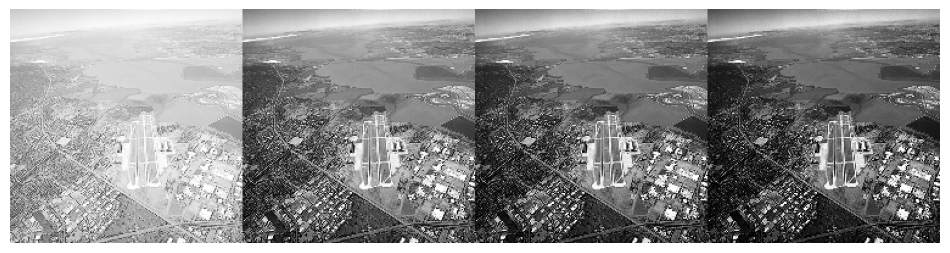

In [246]:
#1

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('1.tif') 
img = cv2.resize(img, dsize=(0, 0), fx=0.25, fy=0.25)

def gamma(f, gamma=1.0):
    f1 = f / 255.0            
    return np.uint8(255*(f1**gamma)) 

gc = np.hstack((
    img,
    gamma(img, 3.0),
    gamma(img, 4.0),
    gamma(img, 5.0)
))

plt.figure(figsize=(12, 6))
plt.imshow(cv.cvtColor(gc, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# ===============
# 감마값이 커질수록 이미지가 어두워보이는 것 같습니다.


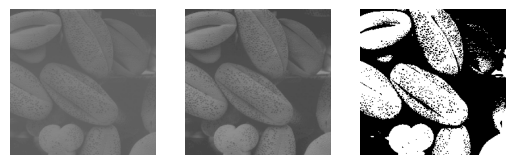

In [248]:
#2

import cv2
import numpy as np
import matplotlib.pyplot as plt

def contrast_stretching(img, r1, s1, r2, s2):
    lut = np.zeros(256, dtype=np.uint8) 

    for r in range(256):
        if r < r1:
            lut[r] = (s1 / r1) * r
        elif r <= r2:
            lut[r] = ((s2 - s1) / (r2 - r1)) * (r - r1) + s1
        else:
            lut[r] = ((255 - s2) / (255 - r2)) * (r - r2) + s2

    return cv.LUT(img, lut)

img = cv2.imread('2.tif')
img = cv2.resize(img, dsize=(0, 0), fx=0.25, fy=0.25)

stretched1 = contrast_stretching(img, 50, 0, 200, 255)
stretched2 = contrast_stretching(img, 110, 0, 111, 255)

plt.subplot(1,3,1)
plt.imshow(img)
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(stretched1)
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(stretched2)
plt.axis('off')

plt.show()

# =====================
# 선형으로 변환하는 함수에서 경계값을 어디로 설정하는지에 따라 이미지가 많이 변하였습니다. 
# 중간에 해당하는 부분이 적을수록 밝기가 더욱 극단적으로 보입니다.


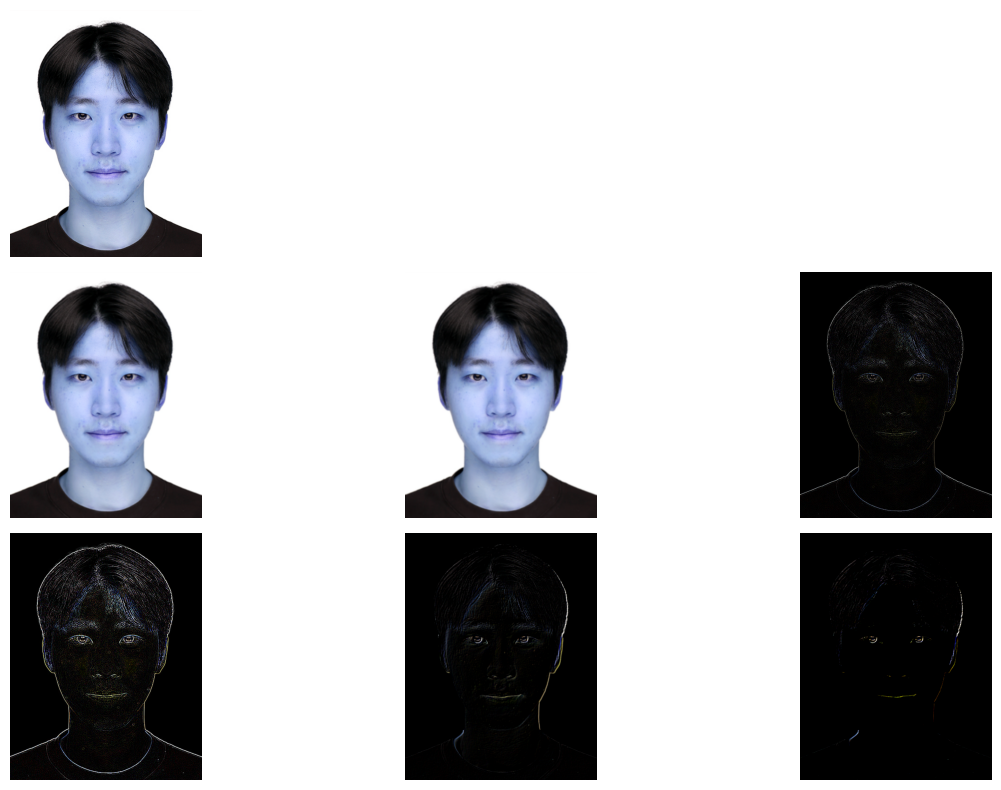

In [244]:
#3

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('3.jpg')

mask1 = np.ones((3,3), np.float32) / 9.0

mask2 = np.array([
    [0.0030, 0.0133, 0.0219, 0.0133, 0.0030],
    [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
    [0.0219, 0.0983, 0.1621, 0.0983, 0.0219],
    [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
    [0.0030, 0.0133, 0.0219, 0.0133, 0.0030]
], dtype=np.float32)

mask3 = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
], dtype=np.float32)

mask4 = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
], dtype=np.float32)

mask5 = np.array([
    [-1, 0, 0],
    [0, 0, 0],
    [0, 0, 1]
], dtype=np.float32)

mask6 = np.array([
    [-1, -1, 0],
    [-1, 0, 0],
    [0, 1, 1]
], dtype=np.float32)


result1 = cv2.filter2D(img, -1, mask1)
result2 = cv2.filter2D(img, -1, mask2)
result3 = cv2.filter2D(img, -1, mask3)
result4 = cv2.filter2D(img, -1, mask4)
result5 = cv2.filter2D(img, -1, mask5)
result6 = cv2.filter2D(img, -1, mask6)

result3 = cv2.convertScaleAbs(result3)
result4 = cv2.convertScaleAbs(result4)
result5 = cv2.convertScaleAbs(result5)
result6 = cv2.convertScaleAbs(result6)

plt.figure(figsize=(12,8))

plt.subplot(3,3,1)
plt.imshow(img)
plt.axis('off')

plt.subplot(3,3,4)
plt.imshow(result1)
plt.axis('off')

plt.subplot(3,3,5)
plt.imshow(result2)
plt.axis('off')

plt.subplot(3,3,6)
plt.imshow(result3)
plt.axis('off')

plt.subplot(3,3,7)
plt.imshow(result4)
plt.axis('off')

plt.subplot(3,3,8)
plt.imshow(result5)
plt.axis('off')

plt.subplot(3,3,9)
plt.imshow(result6)
plt.axis('off')

plt.tight_layout()
plt.show()

# ===================
# 여러 사진으로 작동해본 결과,
# 1번 필터는 원본과 큰 차이를 느끼지 못 했습니다.
# 2번 필터는 거리에 따라 가중치가 달랐는데, 원본에 비해 블러링된 느낌을 받았습니다.
# 3번 필터는 상하좌우 4방위 경계가 주로 검출되는 것으로 보입니다.
# 4번 필터는 전방향의 경계가 고루 검출되는 것으로 보입니다.
# 5번 필터는 우측 하단의 경계만 잘 검출되는 것으로 보입니다.
# 6번 필터는 우측 하단의 경계만 잘 검출되는 것으로 보입니다. 5번과는 다른 차이가 있습니다.

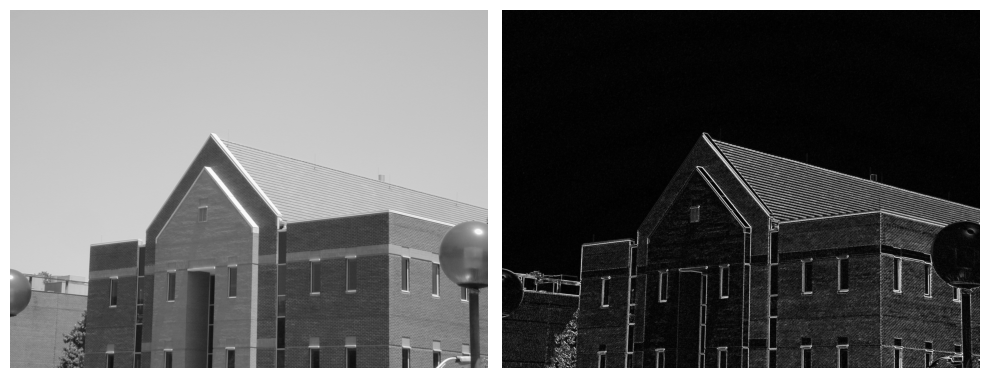

In [242]:
#4
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('4.jpg')

mask = np.array([
    [0, 1, 2],
    [-1, 0, 1],
    [-2, -1, 0]
], dtype=np.float32)

result = cv2.filter2D(img, cv.CV_64F, mask)

result = cv2.convertScaleAbs(result)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result)
plt.axis('off')


plt.tight_layout()
plt.show()


(np.float64(-0.5), np.float64(314.5), np.float64(237.5), np.float64(-0.5))

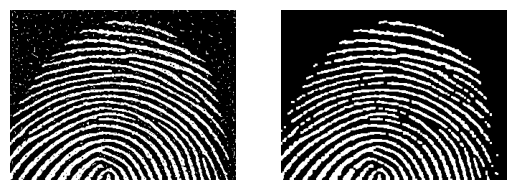

In [161]:
#5
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('5.jpg')

mask = np.ones((3, 3), np.uint8)

result = cv2.morphologyEx(img, cv2.MORPH_OPEN, mask)
result = cv2.morphologyEx(result, cv2.MORPH_CLOSE, mask)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result)
plt.axis('off')



# 더 좋다고 생각이 드는 방법을 찾지 못했습니다.
# 해당 방법은 열림과 닫힘을 적용한 morphological smoothing 입니다.


(np.float64(-0.5), np.float64(485.5), np.float64(485.5), np.float64(-0.5))

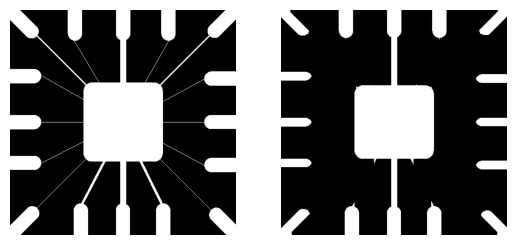

In [195]:
#6
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('6.tif')

mask = np.array([
    [0, 1, 0],
    [0, 1, 0],
    [0, 1, 0]
], dtype=np.uint8)

result = cv2.erode(img, mask, iterations=6)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result)
plt.axis('off')


#==============
# 수직인 선분을 제외한 선분들을 지워봤습니다.
# 3*3짜리 마스크를 적용하였고, 가운데만 1, 나머지는 0으로 설정하였습니다.
# 수직인 성분이 겹쳐야 선분이 유지되므로  수직인 선분만 남게 됩니다.
# 선분의 굵기가 굵은 것은 한 번에 제거되지 않아 반복횟수를 늘려주었습니다.


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

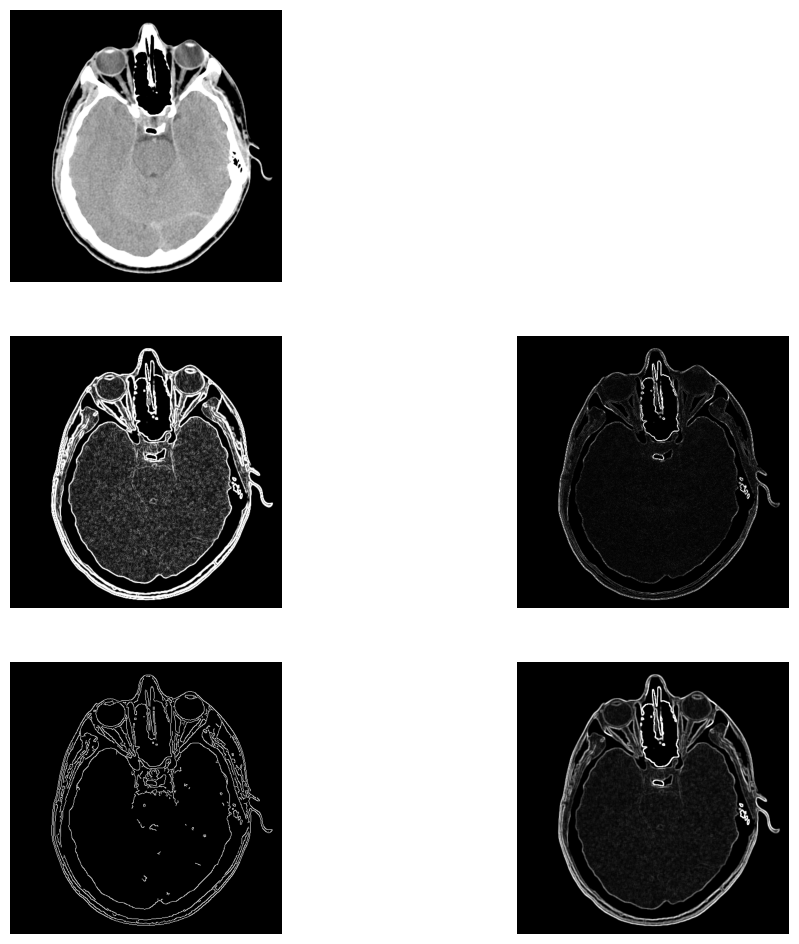

In [225]:
#7
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('7.tif')

sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_result = cv2.magnitude(sobel_x, sobel_y)
sobel_result = cv2.convertScaleAbs(sobel_result)

laplacian_result = cv2.Laplacian(img, cv2.CV_64F)
laplacian_result = cv2.convertScaleAbs(laplacian_result)

canny_result = cv2.Canny(img, 100, 200)

kernel = np.ones((3, 3), np.uint8)
dilated = cv2.dilate(img, kernel)
eroded = cv2.erode(img, kernel)
morph_gradient = dilated - eroded
morph_gradient = cv2.convertScaleAbs(morph_gradient)


plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
plt.imshow(img)
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(sobel_result)
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(laplacian_result)
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(canny_result, cmap='grey')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(morph_gradient)
plt.axis('off')


#==============
# Sobel은 수평 수직 기울기를 이용해 경계를 검출합니다. 뿌연 부분이 마저 제거되지 않아 보입니다.
# laplacian은 방향성없이 미분을 이용하여 구합니다. 노이즈는 제거됐지만 경계는 명확하지 않아 보입니다.
# canny는 비최대 억제와 임계값을 이용하는 방법입니다. 경계가 뚜렷하게 검출된 것으로 보입니다.
# Morphological Gradien은 팽창한 결과에서 침식되 결과를 빼는 방법입니다. 경계가 뚜렷하게 검출된 것으로 보입니다.


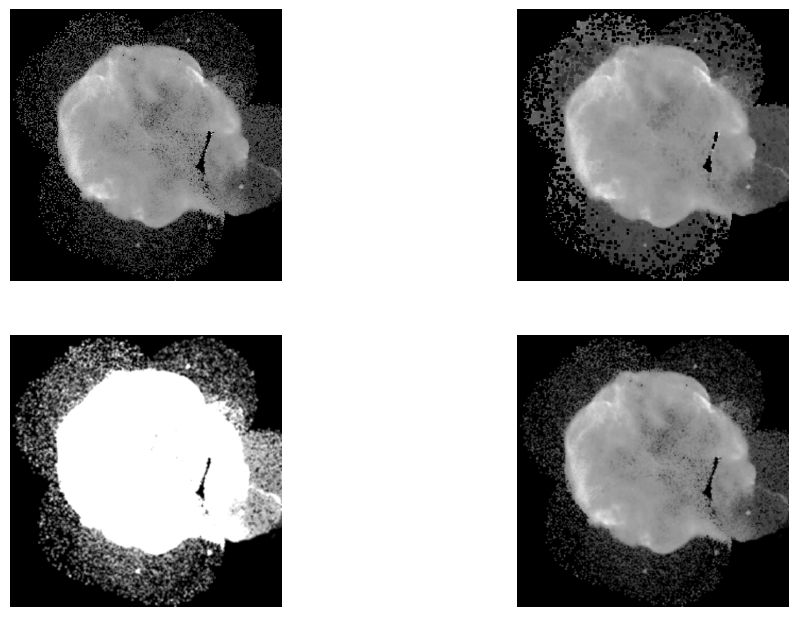

In [306]:
#8

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('8.tif')

kernel = np.ones((5, 5), np.uint8)
morph_result = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
morph_result = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

box_result = cv.filter2D(img, -1, kernel / 9.0 )

kernel2 = np.array([
    [0.0030, 0.0133, 0.0219, 0.0133, 0.0030],
    [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
    [0.0219, 0.0983, 0.1621, 0.0983, 0.0219],
    [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
    [0.0030, 0.0133, 0.0219, 0.0133, 0.0030]
], dtype=np.float32)
gaussian_result = cv2.filter2D(img, -1, kernel2)

plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
plt.imshow(img)
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(morph_result)
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(box_result)
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(gaussian_result)
plt.axis('off')

plt.show()

# 코드는 맞게 작성한 것 같은데...
# morphological smoothing을 적용하기 위해 열림과 닫힘을 각각 적용하였는데 노이즈가 뭉개졌습니다. 
# 커널의 크기를 키울 경우 문제가 더 심해졌습니다.
# 열림만 적용했을 때는 하얀 노이즈가 까맣게 바뀌었는데 닫힘을 적용하니 까맣게 변했던 부분이 다시 하얗게 뭉개졌습니다. 이유는 밝히지 못했습니다.
# 박스 필터를 적용했을 때도 커널을 나누었는데 오히려 더 밝아진 현상이 있었습니다. 이유는 밝히지 못했습니다.
# 가우시안 필터를 적용했을 때는 의도대로 이미지 전반적으로 블러링되어 노이즈가 어느 정도 제거되었습니다.

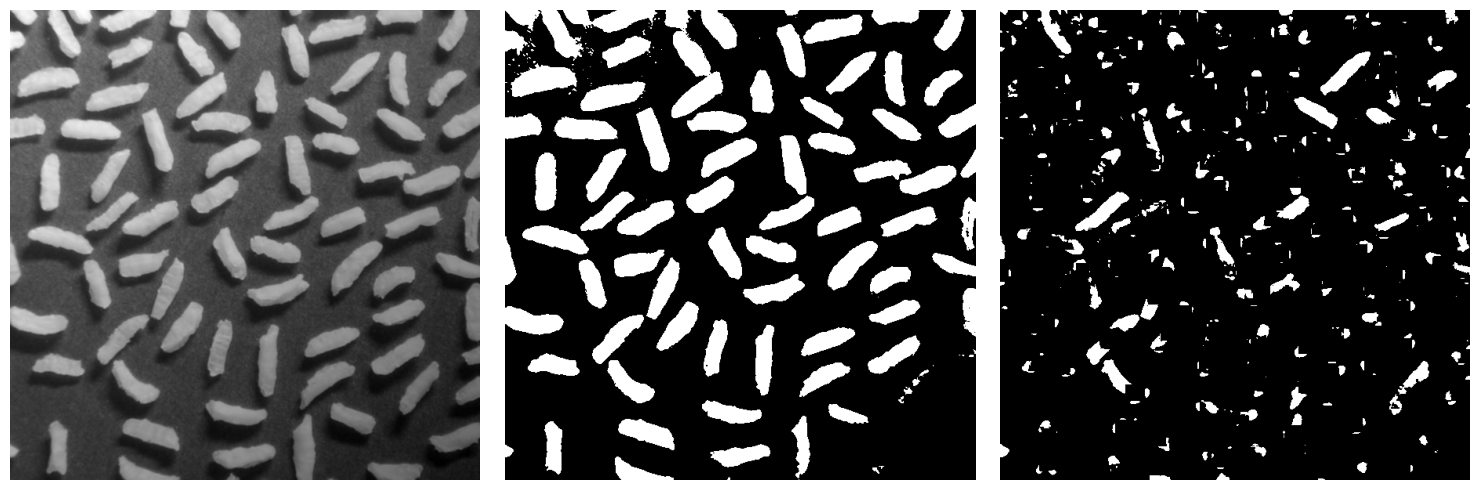

In [325]:
#9

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('9.tif', cv2.IMREAD_GRAYSCALE)

_, otsu_direct = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))

tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

_, tophat_otsu = cv2.threshold(tophat, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(otsu_direct, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(tophat_otsu, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# 알려진 바에 따르면 tophat을 적용했을 경우, 배경에서 밝기의 불균형이 제거되기 때문에 배경과 분리되어 더 좋은 이미지를 얻을 수 있는 것으로 알려져 있습니다
# 그러나 실제로 코드를 작동시킨 결과는 그렇지 않았습니다. 임계값을 잘못 설정했는지 더 좋지 못한 결과를 얻었습니다.

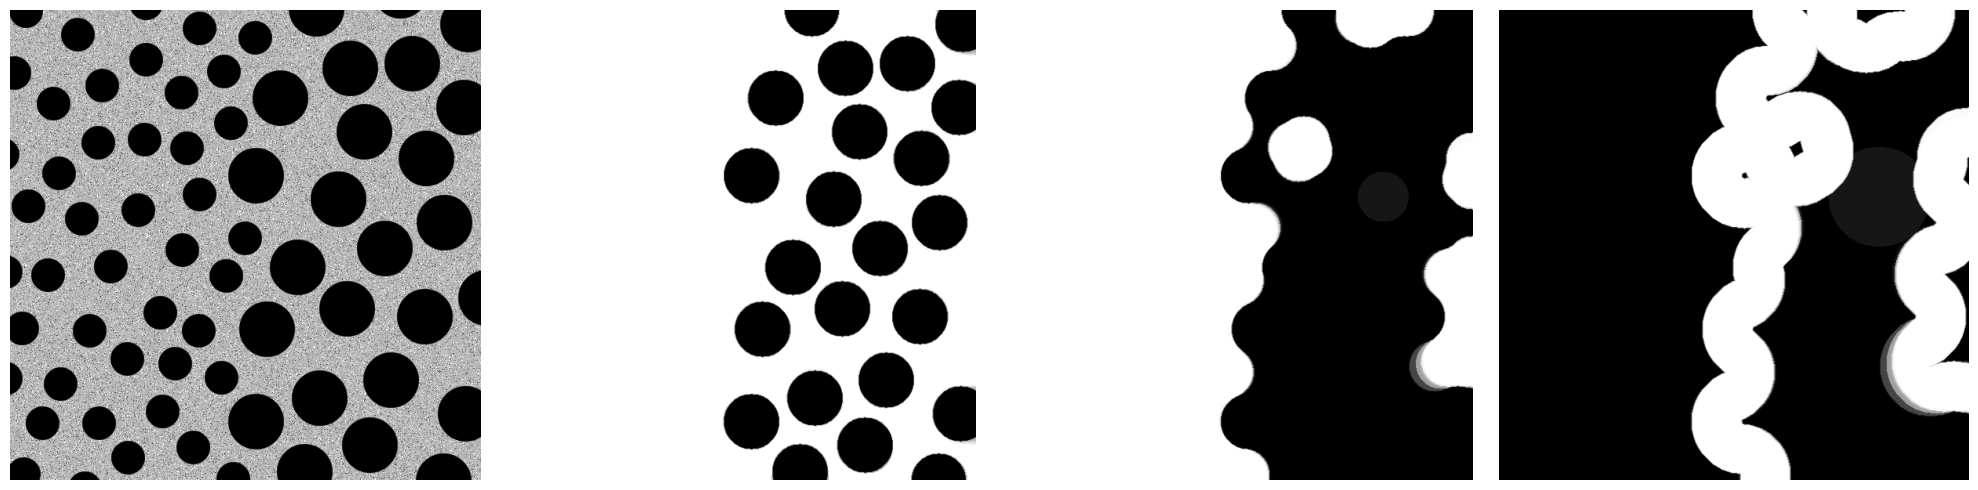

In [347]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("10.tif", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (600, 600))

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (65, 65))

closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel)

dilated = cv2.dilate(opened, kernel)
eroded = cv2.erode(opened, kernel)
gradient = dilated - eroded

superimposed = cv2.addWeighted(img, 0.8, gradient, 0.2, 0)

images = [img, closed, opened, superimposed]

plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(closed, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(opened, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(gradient, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
